# Plotting data in Seaborn


Seaborn is built on matplotlib. It uses the matplotlib to draw the plots
- Distribution Plot: understand the distribution of data
    - Displot
    - Joint Plot
    - Pair Plot
    - Rug Plot
- Categorical Plot: for categorical variables
    - Bar plot
    - Count plot: count the number of occurrences
    - Box Plot: Gives information about:
        - Max
        - Min
        - Mean
        - First Quartile
        - Third Quartile
    - Violin Plot
- Advanced Plots
    - Strip plot: used to plot categorical variable against a continuous one
    - Swarm Plot: strip + violin plots
- Matrix Plot: for 2D array
    - Heat map: 
    - Cluster Map: a better version of heat map
        - Uses Hierarchical Clustering
    - Grids:
        - Facet Grid: distribution of a subset (eg: male in Class 2).
        - Regeression Plot: scatter plot with linear fitting:

##### Refereneces: 
* https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7
* http://seaborn.pydata.org/introduction.html



In [18]:
import seaborn as sns

#### Load A data set over the internet

In [19]:
tips = sns.load_dataset("tips")

In [20]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


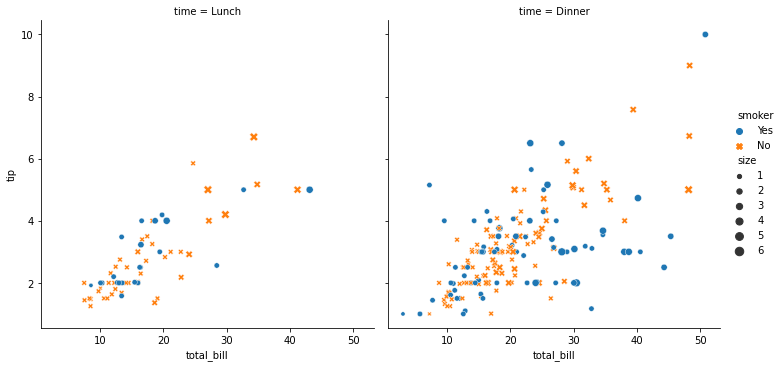

In [22]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

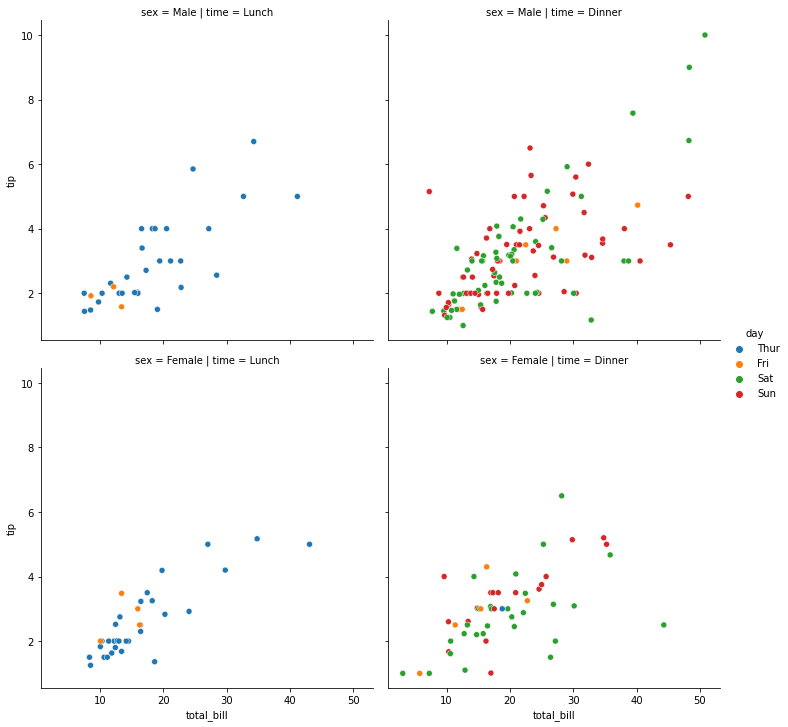

In [23]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

##### Cat plot is for categorical data

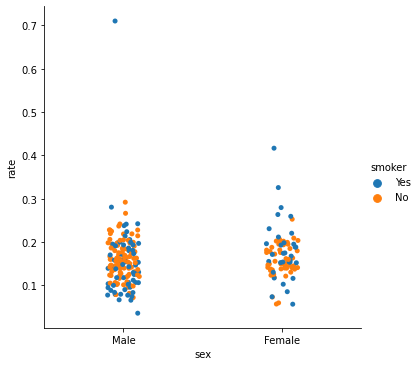

In [41]:
tips_with_rate = tips
tips_with_rate['rate'] = tips_with_rate['tip']/tips_with_rate['total_bill']  
sns.catplot(data=tips, x="sex", y="rate", hue="smoker")

By default catplot plots the strip plot. For a plot where the points dont overlap and space out use the swarm plot

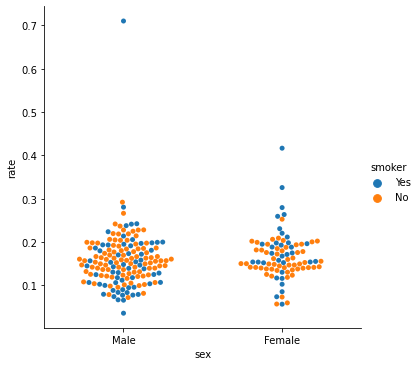

In [46]:
sns.catplot(data=tips, kind="swarm", x="sex", y="rate", hue="smoker")

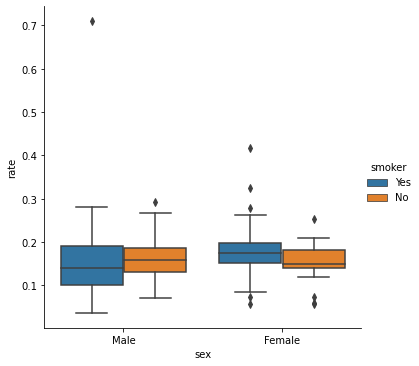

In [49]:
sns.catplot(data=tips, kind="box", x="sex", y="rate", hue="smoker")

The box plot plots the:
* mininum = bottom short black line
* maximum = top short black line
* reactagle = the value of 25% to 75% of the population
* the middle black line in reactangle = median value of the population
* the dots = data outliers

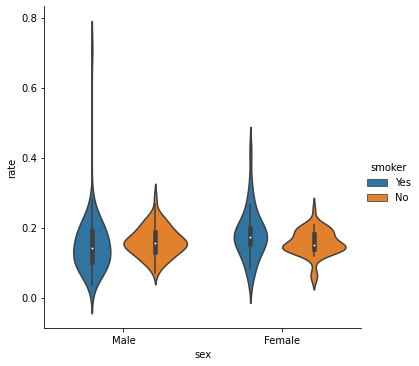

In [42]:
sns.catplot(data=tips, kind="violin", x="sex", y="rate", hue="smoker")

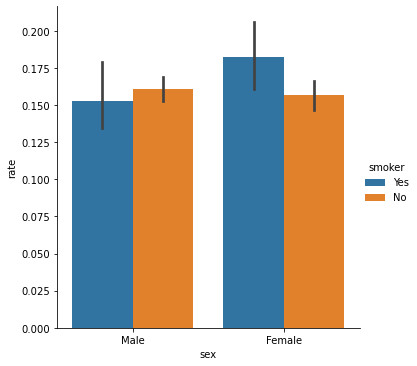

In [43]:
sns.catplot(data=tips, kind="bar", x="sex", y="rate", hue="smoker")

#### Regression Plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

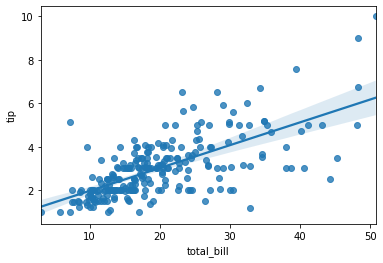

In [50]:
sns.regplot(x="total_bill", y="tip", data=tips)

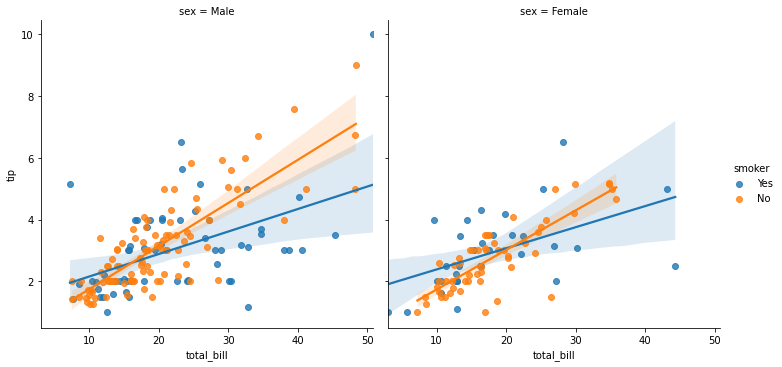

In [56]:
sns.lmplot(x="total_bill", y="tip", data=tips, col="sex", hue="smoker")

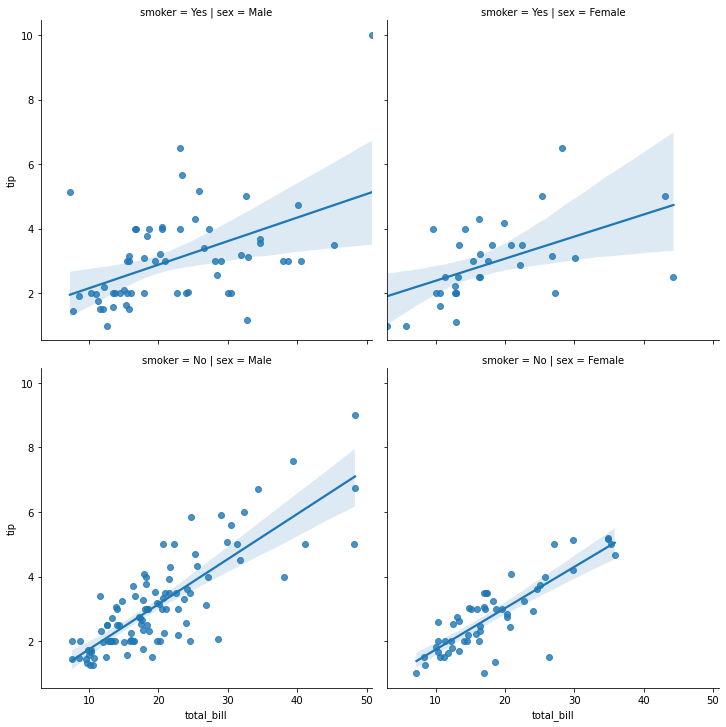

In [55]:
sns.lmplot(x="total_bill", y="tip", data=tips, col="sex", row="smoker")

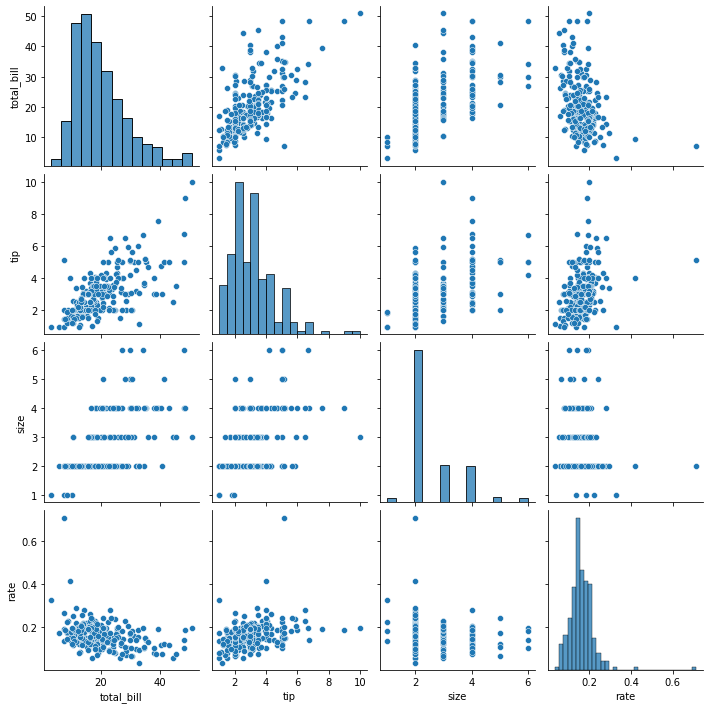

In [57]:
sns.pairplot(tips)

## Following Python Data Science Handbook on Visualization with Seaborn
https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

In [58]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0   610k      0  0:00:01  0:00:01 --:--:--  610k      0 --:--:--  0:00:01 --:--:--     0


In [60]:
import pandas as pd

data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [69]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return (int) (pd.Timedelta(hours=h, minutes=m, seconds=s).total_seconds())

data['split'] = data['split'].apply(convert_time)
data['final'] = data['final'].apply(convert_time)
data.head()

,age,gender,split,final,split_sec
0,33,M,3938,7731,3938
1,32,M,3986,7768,3986
2,31,M,4009,7842,4009
3,38,M,3976,8025,3976
4,31,M,3992,8039,3992


/Users/praveenmathew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


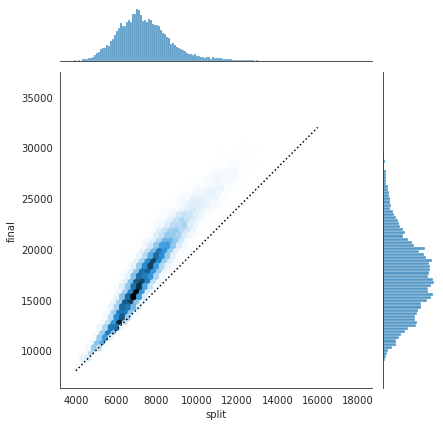

In [72]:
import numpy as np

with sns.axes_style('white'):
    g = sns.jointplot("split", "final", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

#### Splits Analysis
Negetive splits = the split time is more than half the total 

In [75]:
data['split_frac'] = 1 - 2 * data['split'] / data['final']
sum(data.split_frac < 0) # negative splits

251

In [76]:
sum(data.split_frac == 0)

4

In [77]:
sum(data.split_frac > 0)

36995

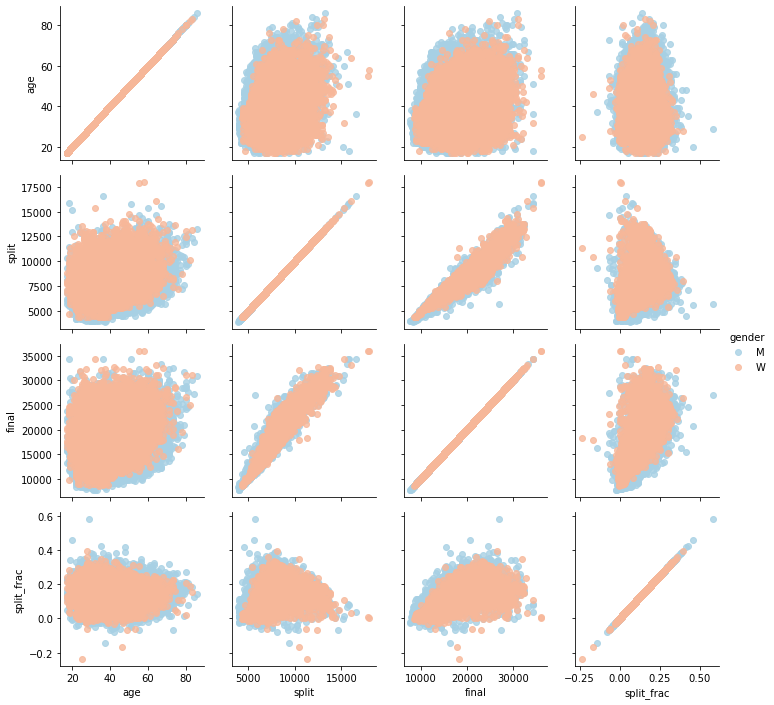

In [80]:
import matplotlib.pyplot as plt
g = sns.PairGrid(data, vars=['age', 'split', 'final', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

/Users/praveenmathew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


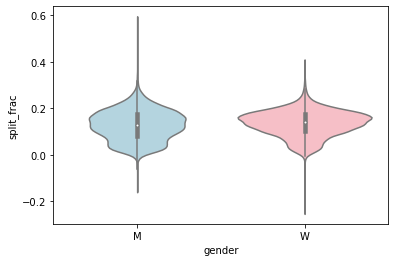

In [81]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [83]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,split_frac,age_dec
0,33,M,3938,7731,3938,-0.018756,30
1,32,M,3986,7768,3986,-0.026262,30
2,31,M,4009,7842,4009,-0.022443,30
3,38,M,3976,8025,3976,0.009097,30
4,31,M,3992,8039,3992,0.006842,30


/Users/praveenmathew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


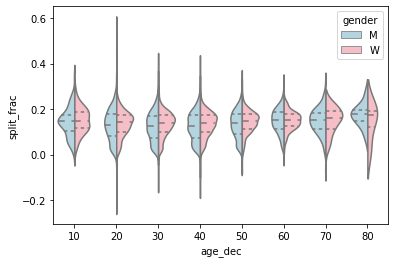

In [84]:
with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

/Users/praveenmathew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


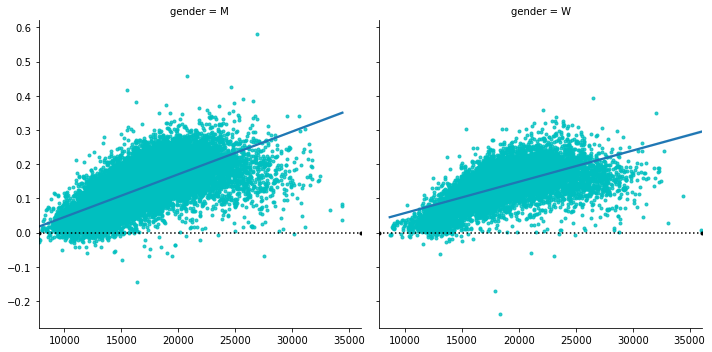

In [87]:
g = sns.lmplot('final', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0, color="k", ls=":");